# Generate the benchmarks results for the threads program

In [10]:
from time import time
from os import popen, chdir, getcwd

# Probably won't work on ur machine
# adjust the working directory where the binary is

chdir("/home/taras/Documents/UB/SO2/5/src")

# The next list of files should also be in the same directory
# as the binary, won't work if not...

# It also suppsoses that u have a folder base_dades/ in this working
# directory, where the files to process are

# Just execute 
#   cd <working_dir> && cp data/* .

files = ["l", "l2", "l3", "l4", "l5", "l6", "l7", "l8", "l9"]
n_lines = [int(popen(f"head -1 {f}").read()) for f in files]

print(n_lines)

[2, 10, 20, 30, 50, 80, 100, 150, 200]


In [2]:
data = []
t_range = [i for i in range(1, 11)]

i = 20

while i <= 500:
    t_range.append(i)
    i += 10

len(t_range)

59

In [3]:
tt = time()

for threads in t_range:
    e_t = time()
    curr = []
    
    for f in files:
        t = time()
        o = popen(f"./test {threads} {f}").read()
        t = time() - t
        
        curr.append(t)
    
    print(f"Test for {threads} threads done, elapsed {time()-e_t:4.6f} s.")
        
    data.append(curr)
    
tt = time() - tt

print(f"Elapsed time: {tt:4.6f} s.")

Test for 1 threads done, elapsed 26.380100 s.
Test for 2 threads done, elapsed 24.813988 s.
Test for 3 threads done, elapsed 24.787231 s.
Test for 4 threads done, elapsed 24.880853 s.
Test for 5 threads done, elapsed 25.442161 s.
Test for 6 threads done, elapsed 25.014833 s.
Test for 7 threads done, elapsed 25.001183 s.
Test for 8 threads done, elapsed 25.018227 s.
Test for 9 threads done, elapsed 25.004120 s.
Test for 10 threads done, elapsed 25.635932 s.
Test for 20 threads done, elapsed 25.224446 s.
Test for 30 threads done, elapsed 25.331227 s.
Test for 40 threads done, elapsed 25.701858 s.
Test for 50 threads done, elapsed 25.107088 s.
Test for 60 threads done, elapsed 25.494638 s.
Test for 70 threads done, elapsed 25.210489 s.
Test for 80 threads done, elapsed 25.448680 s.
Test for 90 threads done, elapsed 25.094842 s.
Test for 100 threads done, elapsed 25.295382 s.
Test for 110 threads done, elapsed 25.481553 s.
Test for 120 threads done, elapsed 25.274960 s.
Test for 130 thread

In [4]:
for d in data:
    print("|", end="")
    
    for dt in d:
        print(f" {dt:2.6f} |", end="")
        
    print()

| 0.585671 | 0.779976 | 0.866648 | 1.771224 | 2.323538 | 2.829335 | 3.750929 | 5.369612 | 8.103111 |
| 0.493840 | 0.645664 | 0.868585 | 1.104604 | 2.102553 | 2.801080 | 3.759274 | 5.204332 | 7.834002 |
| 0.499802 | 0.620317 | 0.864558 | 1.125306 | 2.042996 | 2.828998 | 3.687992 | 5.204164 | 7.913031 |
| 0.497444 | 0.604590 | 0.869596 | 1.114279 | 2.072598 | 2.898751 | 3.687119 | 5.177637 | 7.958778 |
| 0.494849 | 0.620116 | 0.872177 | 1.122010 | 2.126407 | 3.015716 | 3.791685 | 5.220302 | 8.178841 |
| 0.498546 | 0.619402 | 0.886679 | 1.124033 | 2.103837 | 2.831130 | 3.717644 | 5.294411 | 7.939082 |
| 0.501364 | 0.618329 | 0.874705 | 1.103076 | 2.119825 | 2.827500 | 3.798447 | 5.219029 | 7.938834 |
| 0.492112 | 0.603004 | 1.062385 | 1.146986 | 2.128732 | 2.822066 | 3.679972 | 5.223477 | 7.859416 |
| 0.499760 | 0.636529 | 0.852158 | 1.089800 | 2.075183 | 2.811718 | 3.654821 | 5.220648 | 8.163438 |
| 0.490502 | 0.623830 | 0.871584 | 1.109943 | 2.113403 | 2.816497 | 3.783352 | 5.713041 | 8

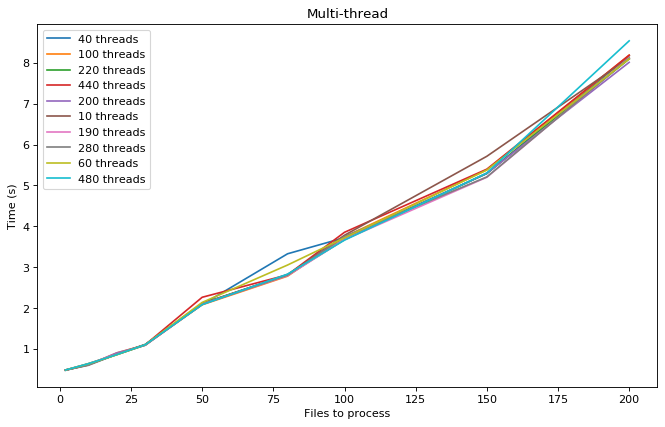

In [9]:
import numpy
from matplotlib import pyplot as plt

%matplotlib inline

cwd = getcwd()
path = f"{cwd}/doc/"

plt.figure(figsize=(10, 6), dpi=80)

for i, d in sorted(zip(t_range, data), key=lambda x: x[1], reverse=False)[:10]:
    plt.plot(n_lines, d, label=f"{i:2d} " + ("thread" if i == 1 else "threads"))
    
plt.title("Multi-thread")
plt.xlabel("Files to process")
plt.ylabel("Time (s)")

plt.legend()
plt.show()

In [6]:
numpy.savetxt(f"{path}bench_data_p5_3.csv", numpy.asarray(data), delimiter=",")

# Benchmark image generation

In [118]:
import pandas as pd

pd_forks = pd.read_csv(f"{cwd}/doc/bench_data_p4.csv")
pd_threads = pd.read_csv(f"{cwd}/doc/bench_data_p5_2.csv")

pd_forks = pd_forks.set_index("n_forks")
pd_threads = pd_threads.set_index("n_threads")

pd_forks = pd_forks.T
pd_threads = pd_threads.T

pd_forks.rename(columns={
    col: f"{col} forks"
    for col in pd_forks.columns
}, inplace=True)

pd_threads.rename(columns={
    col: f"{col} threads"
    for col in pd_threads.columns
}, inplace=True)

Text(0, 0.5, 'Time in seconds')

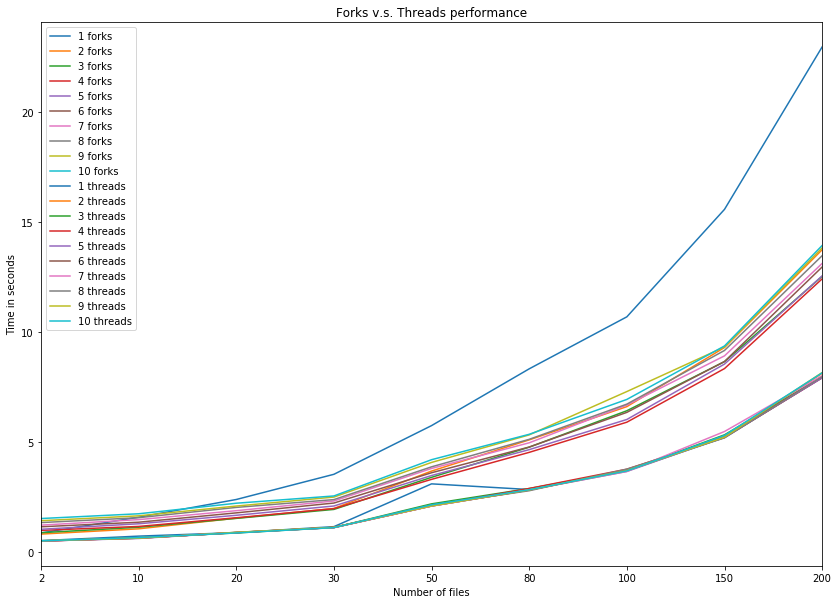

In [119]:
pd_all = pd.concat([pd_forks, pd_threads], axis=1)

pd_plt = pd_all.plot(figsize=(14, 10), title="Forks v.s. Threads performance", kind="line")

pd_plt.set_xlabel("Number of files")
pd_plt.set_ylabel("Time in seconds")